## Question

In this assignment, you will explore the logistic regression algorithm and apply it to a dataset from
Kaggle. This will provide an opportunity to practice key data science skills, including data retrieval,
preprocessing, model fitting, inference, and evaluation.
You will use the diabetes dataset available on Kaggle, which originates from a study conducted by
the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to develop a
classification model to predict whether a patient has diabetes based on their diagnostic measure-
ments. Additionally, you will analyze and interpret the logistic regression model to understand its
findings.

1. Download the diabetes dataset from Kaggle. Properly cite the dataset in your work.

# References
[Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) [@akturk2020diabetes]

\newpage

2. Load the dataset into a pandas DataFrame for analysis.

In [31]:
import pandas as pd

# Load the dataset into a pandas DataFrame
dataset = "/Users/jaspreetbrar/Desktop/Classes/Stats3DA3/A5/diabetes.csv"
diabetes_df = pd.read_csv(dataset)

# Display the first few rows of the dataset
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


\newpage

3. Perform an initial exploration of the dataset to understand its structure (the number of
features, observations, and variable types). Write at least three findings from the exploratory
data analysis.

In [32]:
# Dimension fo the dataset
print(diabetes_df.shape)
# Number of features (columns) in the dataset
num_features = diabetes_df.shape[1]
print(f"Number of features: {num_features}")
# Number of observations (rows) in the dataset
num_observations = diabetes_df.shape[0]
print(f"Number of observations: {num_observations}")

# Variable types in the dataset
diabetes_df.dtypes


(768, 9)
Number of features: 9
Number of observations: 768


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The dimension of our dataset is 768 by 9, so we have 768 observations and 9 feature variables. Our feature variables are number of pregnancies, glucose levels, blood pressure (in mm Hg), skin thickness (in mm), insulin level (mu U/ml), BMI (weight in kg/(height in m)^2), diabetes pedigree function, age (in years), and outcome (class variable: 0 if the person doesn't have diabetes and 1 if the person has diabetes; our response variable). All of our variables are numeric.

\newpage

4. Generate summary statistics for the dataset, including descriptive statistics for categorical
variables if there is any. Provide at least two statements based on the results. Don’t include
the response variable in this summary statistics.

In [33]:
# Generate summary statistics for the dataset excluding the outcome variable
summary_statistics = diabetes_df.drop(columns=['Outcome']).describe()

# Display the summary statistics
print(summary_statistics)

# Check if there are any categorical variables in the dataset
categorical_columns = diabetes_df.select_dtypes(include=['object', 'category']).columns

if len(categorical_columns) > 0:
    # Generate descriptive statistics for categorical variables
    categorical_stats = diabetes_df[categorical_columns].describe()
    print(categorical_stats)
else:
    print("No categorical variables found in the dataset.")

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

In [34]:
# Generate descriptive statistics for the Outcome variable
outcome_stats = diabetes_df['Outcome'].describe()

# Display the descriptive statistics
print(outcome_stats)

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64


\newpage

5. Visualize the distribution of the diabetes outcome variable. Provide at least one statement
based on the plot.

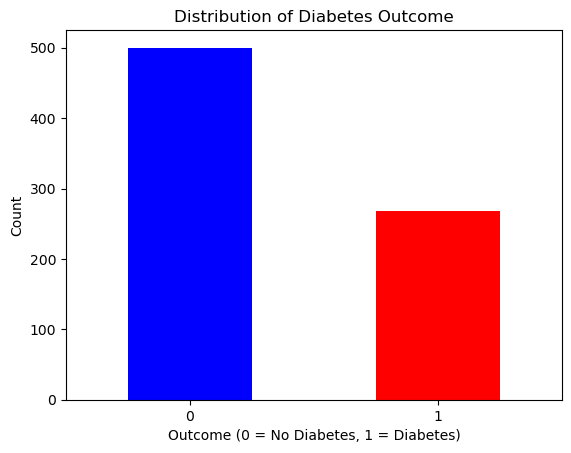

In [35]:
import matplotlib.pyplot as plt

# Plot the distribution of the Outcome variable
diabetes_df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

We see that 500 people do not have diabetes and about 250 individuals have diabetes.

\newpage

6. Check for missing values in the dataset. If any are found, report the number of observations
with missing values. Do not remove them from the analysis, as the reason for their absence
or irrelevant values is unknown.

In [36]:
# Check for recorded values of 0 in the Glucose, Blood Pressure, Insulin, and BMI variables.
# These are missing values.
columns_to_check = ['Glucose', 'BloodPressure', 'Insulin', 'BMI']
zero_values = zero_values[columns_to_check]

# Display the number of 0s for the specified columns
print("Number of 0s in specific columns:")
print(zero_values)

Number of 0s in specific columns:
Glucose            5
BloodPressure     35
Insulin          374
BMI               11
dtype: int64


So we have 5 missing glucose values, 35 missing blood pressure values, 374 missing insulin values, and 11 missing BMIs.

\newpage

7. Skip the outlier analysis. Standardize the numerical predictor variables to ensure they are on
the same scale.

In [37]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns to standardize
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                      'BMI', 'DiabetesPedigreeFunction', 'Age']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
diabetes_df[numerical_columns] = scaler.fit_transform(diabetes_df[numerical_columns])

# Display the first few rows of the standardized dataset
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


\newpage

8. Split the dataset into a training set(75%) and a testing set (25%).

In [42]:
from sklearn.model_selection import train_test_split

# Separate the predictor variables (X) and the response variable (y)
X = diabetes_df[numerical_columns]
y = diabetes_df['Outcome']

# Perform stratified random sampling to maintain the class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (576, 8), (576,)
Testing set shape: (192, 8), (192,)


In [43]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


\newpage

9. Create an instance of the logistic regression using scikit-learn. Change the maximum
number of iterations taken for the solvers to converge to 120.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
logistic_model = LogisticRegression(max_iter=120, random_state=0)

# Display the model instance
logistic_model

LogisticRegression(max_iter=120, random_state=0)

\newpage

10. Train the model on the training set and generate probability predictions for the test set.

In [ ]:
# Train the logistic regression model on the training set
logistic_model.fit(X_train, y_train)

# Generate probability predictions for the test set
y_pred_prob = logistic_model.predict_proba(X_test)

# Display the first few rows of the predicted probabilities
print(y_pred_prob[:5])

# Identify the order of categories in the target variable
category_order = logistic_model.classes_

# Display the order of categories
print("Order of categories in the target variable:", category_order)

[[0.68913601 0.31086399]
 [0.8973442  0.1026558 ]
 [0.84457296 0.15542704]
 [0.87589897 0.12410103]
 [0.88053001 0.11946999]]
Order of categories in the target variable: [0 1]
Order of categories in the target variable within the predicted probability array: [[0.68913601 0.31086399]
 [0.8973442  0.1026558 ]
 [0.84457296 0.15542704]
 [0.87589897 0.12410103]
 [0.88053001 0.11946999]]


\newpage

11. Calculate the test accuracy of the model using a probability cutoff of 0.5 to classify individuals
as at risk for diabetes. Discuss the model’s performance, such as comparing it to random
guessing (e.g., flipping a coin).

In [59]:
from sklearn.metrics import accuracy_score

# Convert predicted probabilities to binary predictions using a cutoff of 0.5
y_pred_binary = (y_pred_prob[:, 1] >= 0.5).astype(int)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_binary)

# Display the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")

# Discuss the model's performance
if test_accuracy > 0.5:
    print("The model performs better than random guessing (flipping a coin).")
else:
    print("The model does not perform better than random guessing.")

Test Accuracy: 0.78
The model performs better than random guessing (flipping a coin).


The test accuracy of the model using a probability cutoff of 0.5 to classify individuals as at risk for diabetes is 0.78, or 78%.
This is better than random guessing through flipping a coin for example, which has a test accuracy of 50%.

\newpage

12. Evaluate the sensitivity and specificity of the model on the test set using a probability cutoff
of 0.5 for diabetes classification.

In [64]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)

# Extract true positives, true negatives, false positives, and false negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

# Display the results
print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")

[[111  14]
 [ 28  39]]
Sensitivity (True Positive Rate): 0.58
Specificity (True Negative Rate): 0.89


The sensitivity is 0.58 and the specificity is 0.89.

\newpage

13. Discuss potential improvements for diabetes prediction based on the test set results, including
accuracy and the confusion matrix. Provide at least one statement based on your analysis.

In [ ]:
Our test set results show that we have an imbalance in the sensitivity and specificity
observed in the confusion matrix. The specificity of 0.89 is significantly high,
indicating the model is good at identifying individuals without diabetes, but the
sensitivity is much lower (0.58), indicating the model struggles to correctly identify
individuals with diabetes.

The confusion matrix shows that the model misclassifies 28 diabetic patients as
non-diabetic (false negatives), leading to low sensitivity (0.58). To improve, we could
adjust the probability cutoff to prioritize sensitivity or address class imbalance
through oversampling such as SMOTE or using class-weighted logistic regression to help
improve the model's ability to detect positive cases of diabetes. We can also decrease
the probability cutoff from 0.5 to a lower value, which may increase the sensitivity
but reduce specificity.

\newpage

14. Perform ROC analysis on the test set and plot the ROC curve.
• Additionally, calculate the area under the ROC curve (AUC).
• Determine the optimal probability cutoff point for diabetes classification.
• Discuss how changing the cutoff affects sensitivity, specificity, and overall classification
performance (at least two statements).

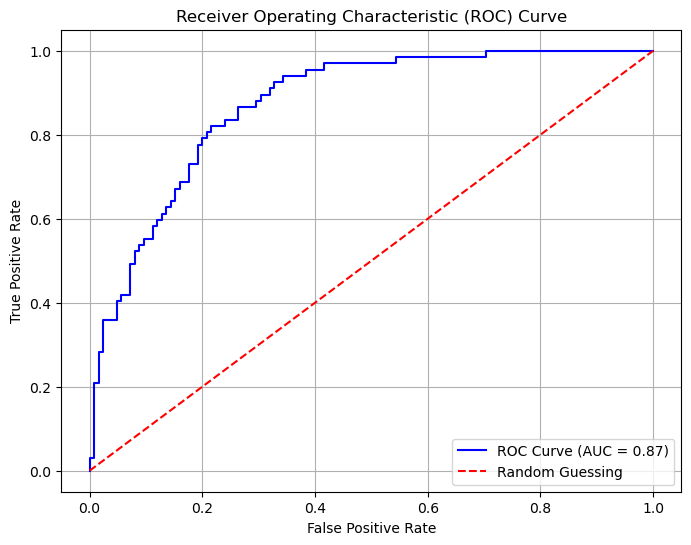

The area under the ROC curve (AUC) is: 0.8723582089552239


In [73]:
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"The area under the ROC curve (AUC) is: {roc_auc}")

In [74]:
# Calculate Youden's J statistic for each threshold
youden_j = tpr - fpr

# Find the index of the maximum Youden's J statistic
optimal_index = youden_j.argmax()

# Determine the optimal probability cutoff
optimal_cutoff = thresholds[optimal_index]

# Display the optimal cutoff point
print(f"Optimal Probability Cutoff: {optimal_cutoff}")

Optimal Probability Cutoff: 0.32167716084037734


In [75]:
# Convert predicted probabilities to binary predictions using the optimal cutoff
y_pred_binary_optimal = (y_pred_prob[:, 1] >= optimal_cutoff).astype(int)

# Generate the confusion matrix for the new binary predictions
conf_matrix_optimal = confusion_matrix(y_test, y_pred_binary_optimal)

# Extract true positives and false negatives
tn_optimal, fp_optimal, fn_optimal, tp_optimal = conf_matrix_optimal.ravel()

# Calculate the new sensitivity (true positive rate)
new_sensitivity = tp_optimal / (tp_optimal + fn_optimal)

# Display the new sensitivity
print(f"New Sensitivity (True Positive Rate): {new_sensitivity:.2f}")

New Sensitivity (True Positive Rate): 0.82


In [76]:
specificity_optimal = tn_optimal / (tn_optimal + fp_optimal)
print(f"New Specificity: {specificity_optimal:.2f}")

New Specificity: 0.78


As we can see, using the optimal cutoff of 0.35 improved the balance between sensitivity (0.82) 
and specificity (at 0.78), whereas at a probably cutoff of 0.5, the specificity of the model
rises to 0.89 but sensitivity drops to 0.58, causing us to miss more diabetic cases. 

We should use a lower cut-off for early screening of diabetes as it minimizes missed cases
due to its higher sensitivity, and we should use a higher cut-off for confirmatory testing,
as it minimizes false alarms due to having a higher specificity.

\newpage

15. The remaining questions will use the selected predictor variables: ‘Pregnancies’, ‘Glucose’,
‘BloodPressure’, ‘SkinThickness’, ‘Insulin’, ‘BMI’, and ‘DiabetesPedigreeFunction’.
• Identify which predictor variable is missing from the model.
• Fit a logistic regression model using the selected predictor variables (use the maximum
number of iterations taken for the solvers to converge to 120).

In [77]:
# Identify the missing predictor variable
all_predictors = set(numerical_columns)
selected_predictors = {'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                        'BMI', 'DiabetesPedigreeFunction'}
missing_predictor = all_predictors - selected_predictors
print(f"Missing predictor variable: {missing_predictor}")

# Fit a logistic regression model using the selected predictor variables
X_selected = X_train[list(selected_predictors)]
logistic_model_selected = LogisticRegression(max_iter=120, random_state=0)
logistic_model_selected.fit(X_selected, y_train)

# Display the fitted model
logistic_model_selected

Missing predictor variable: {'Age'}


LogisticRegression(max_iter=120, random_state=0)

\newpage

16. Based on the model in (15), what can you conclude about the missing predictor variable in
predicting the risk of diabetes (‘Outcome’)?

In [80]:
from sklearn.metrics import accuracy_score

# Remove the 'Age' column from the test set
X_test_without_age = X_test.drop(columns=['Age'])

# Ensure the columns in X_test_without_age are in the same order as X_selected
X_test_without_age = X_test_without_age[X_selected.columns]

# Generate probability predictions for the test set without 'Age'
y_pred_prob_without_age = logistic_model_selected.predict_proba(X_test_without_age)

# Convert predicted probabilities to binary predictions using the optimal cutoff
y_pred_binary_without_age = (y_pred_prob_without_age[:, 1] >= optimal_cutoff).astype(int)

# Calculate the test accuracy
test_accuracy_without_age = accuracy_score(y_test, y_pred_binary_without_age)

# Display the test accuracy
print(f"Test Accuracy without 'Age': {test_accuracy_without_age:.2f}")

Test Accuracy without 'Age': 0.80


Without the age variable, our test accuracy has increased from 0.78 to 0.8.
This suggests that Age contributes slightly to the predictive performance.

\newpage

I used GitHub Copilot for assistance.